# Pre-processing exercise

In this exercise you will pre-prcess the [California housing dataset](https://www.kaggle.com/camnugent/california-housing-prices). 


The pre-processing needs to have the next parts: 
- [ ] Basic inspection of the data. 
- [ ] Dealing with missing values (you can choose what to do with them in each case). 
- [ ] Finding outliers and decide what to do with them. 
- [ ] Extract new variables. 
- [ ] Transform all categorical variables into one-hot-encoding variables. 
- [ ] Transform the numerical variables; you can use MinMax, Standarization, boxcox or any other transformation that makes sense. 


In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
housing = pd.read_csv("housing.csv", header=0, delimiter=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.301,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

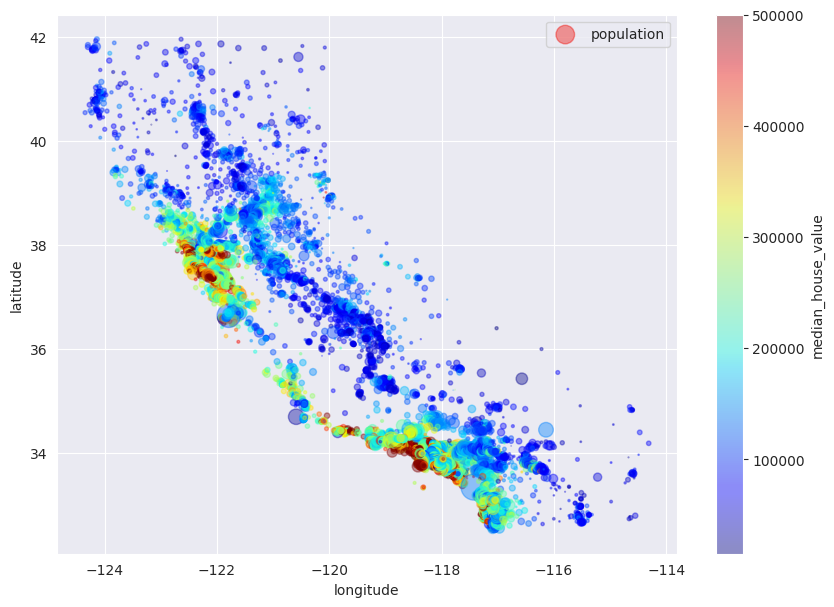

In [4]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [6]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
subset_of_housing = housing.drop(columns=['total_bedrooms','ocean_proximity'])

In [9]:
subset_of_housing.shape
housing.shape

(20640, 8)

(20640, 10)

In [10]:
rows_not_missing = housing.total_bedrooms.notna()
rows_missing = housing.total_bedrooms.isna()
rows_not_missing.sum()
rows_missing.sum()

20433

207

In [11]:
housing_without_missings = subset_of_housing[rows_not_missing]
housing_without_missings.shape

(20433, 8)

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(housing_without_missings, housing.total_bedrooms[rows_not_missing])
imputed_values = knn.predict(subset_of_housing[rows_missing]);

In [13]:
housing.total_bedrooms[rows_missing] = imputed_values

/tmp/ipykernel_33001/3477941485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.total_bedrooms[rows_missing] = imputed_values


In [14]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: >

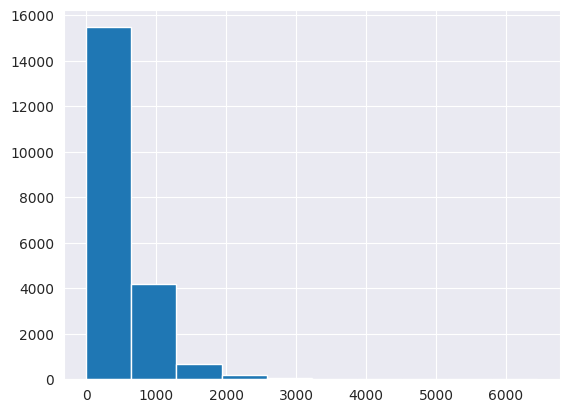

In [15]:
housing.total_bedrooms.hist()

# -----

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.547,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,420.559,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,295.750,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [21]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [23]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [26]:
housing.ocean_proximity.replace(["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"], 
                                [1, 2, 3, 4, 5], inplace=True)

In [ ]:
housing.Income.hist(figsize=(8,8));

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

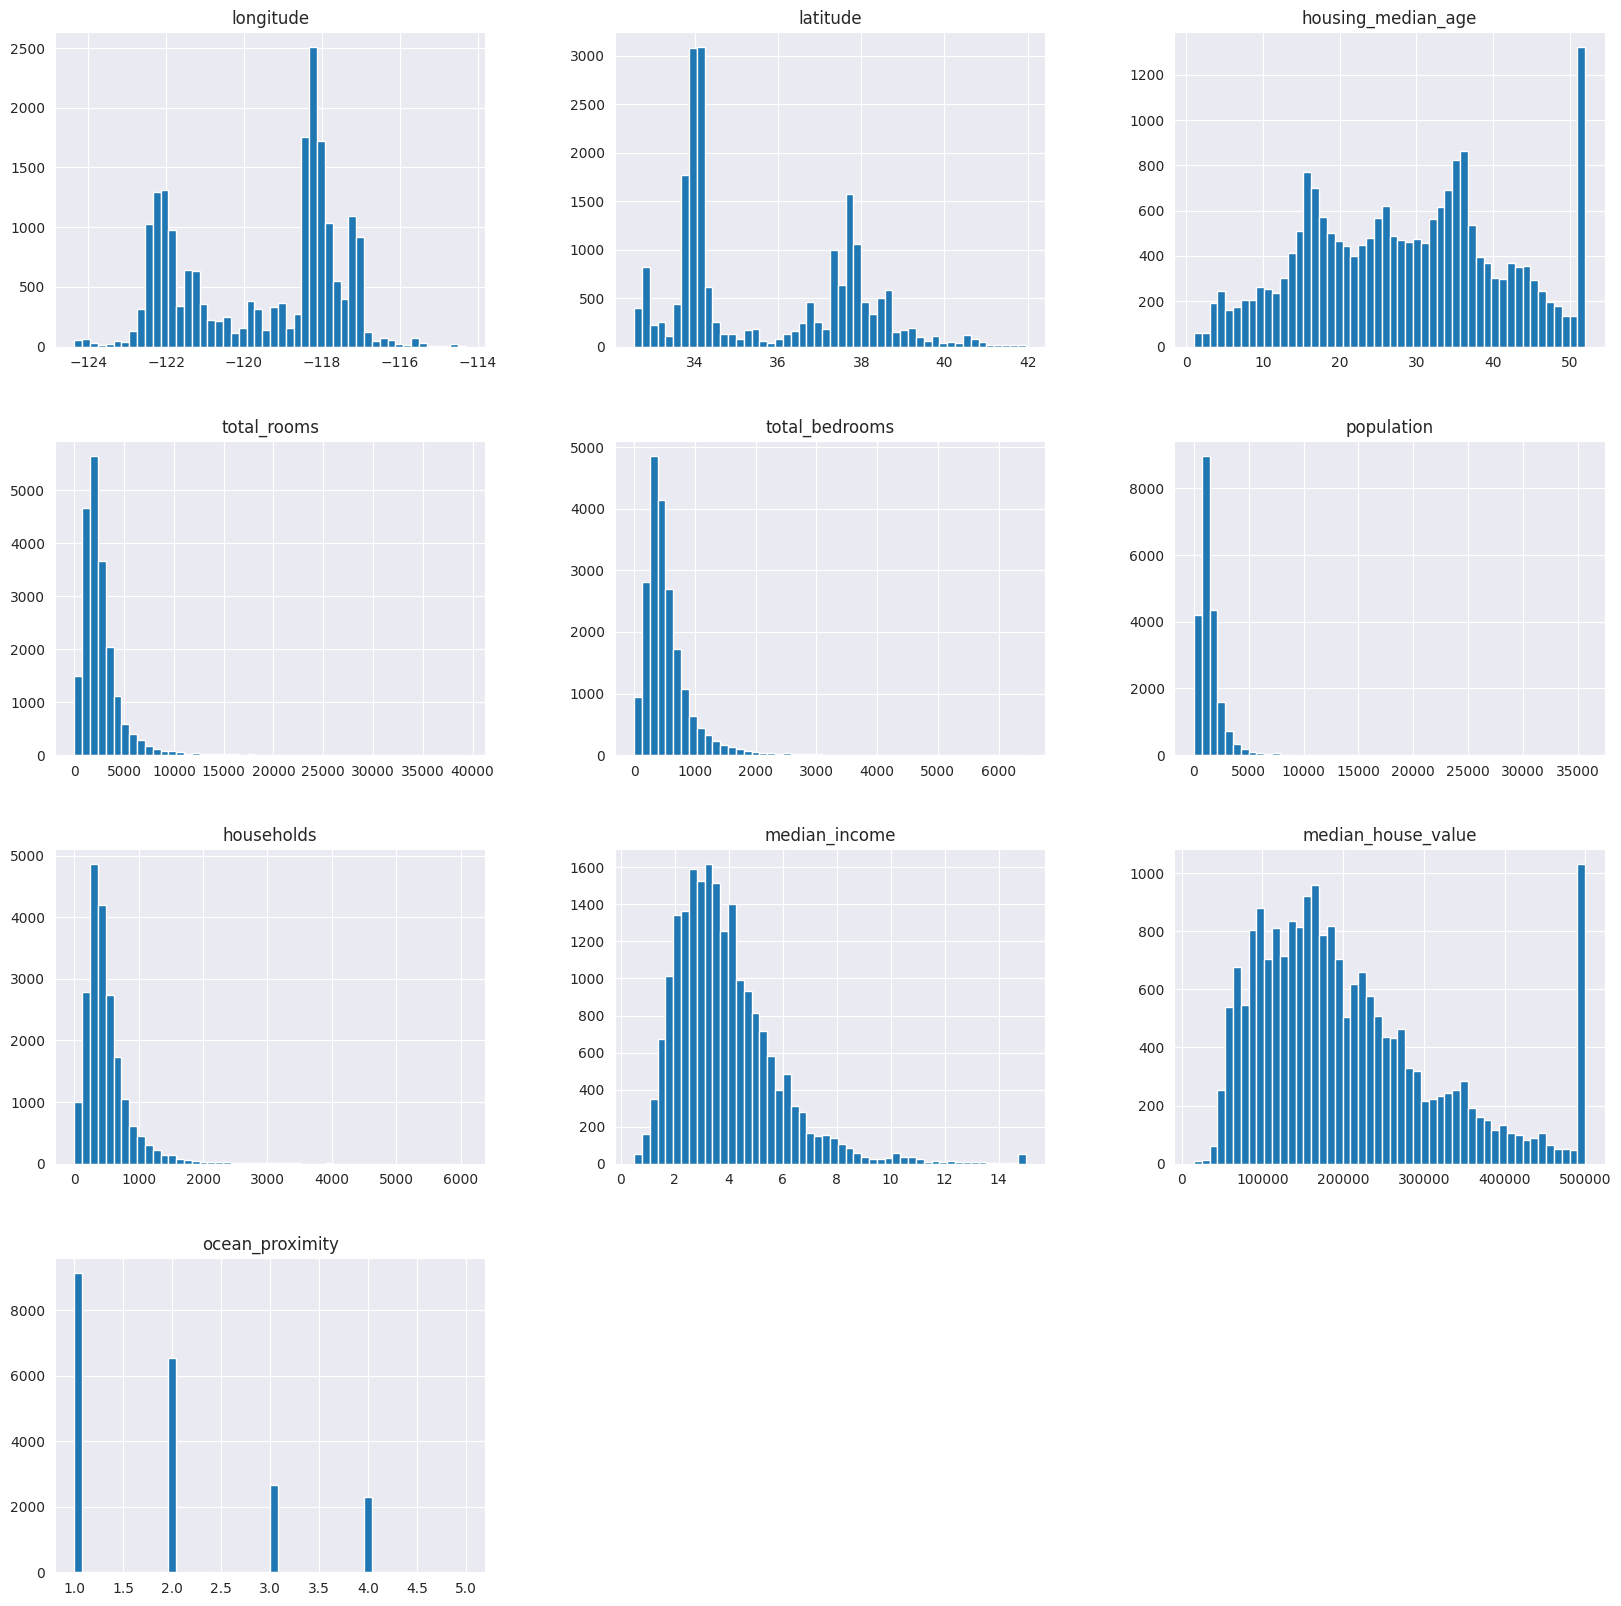

In [43]:
housing.hist(bins=50, figsize=(20, 20))
plt.show()

<Axes: >

array([<Axes: title={'center': 'housing_median_age'}>], dtype=object)

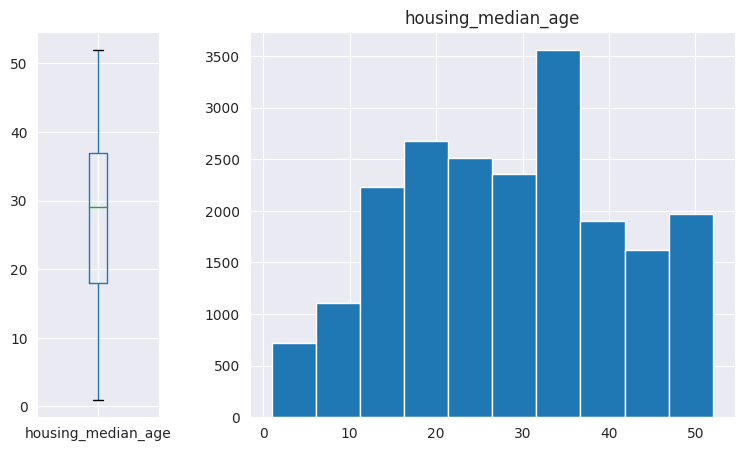

<Axes: >

array([<Axes: title={'center': 'total_rooms'}>], dtype=object)

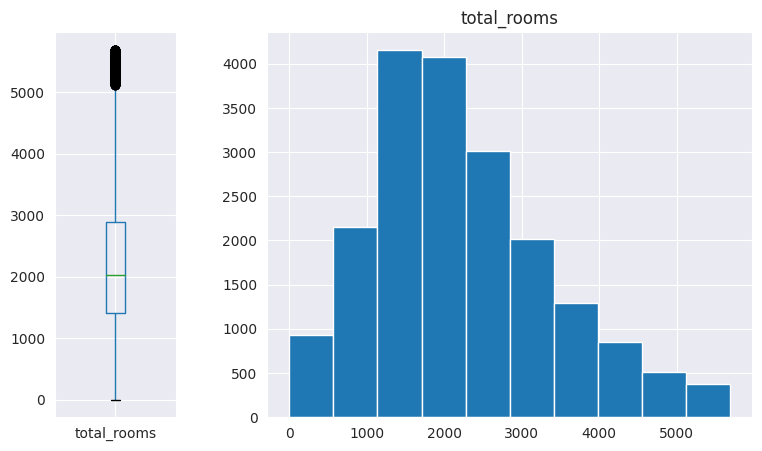

<Axes: >

array([<Axes: title={'center': 'total_bedrooms'}>], dtype=object)

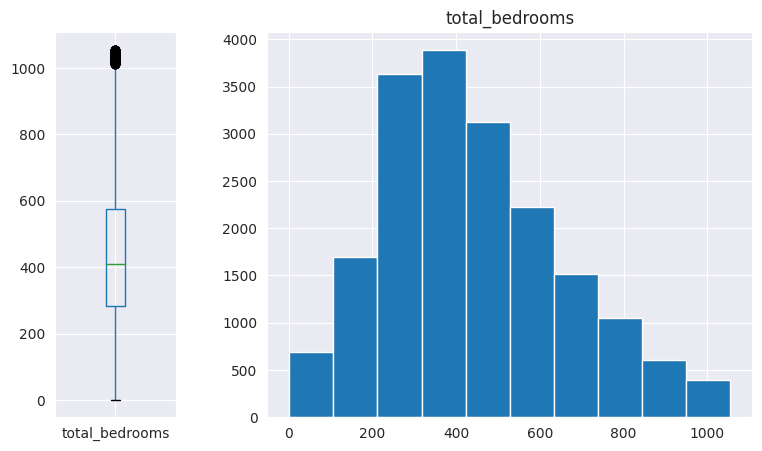

<Axes: >

array([<Axes: title={'center': 'population'}>], dtype=object)

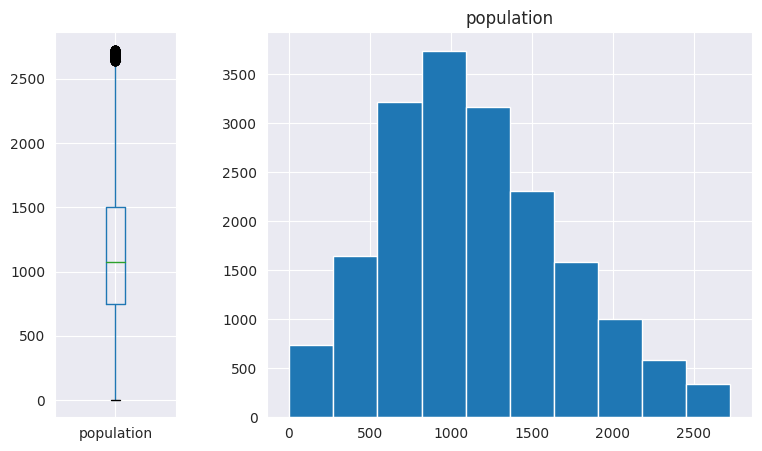

<Axes: >

array([<Axes: title={'center': 'households'}>], dtype=object)

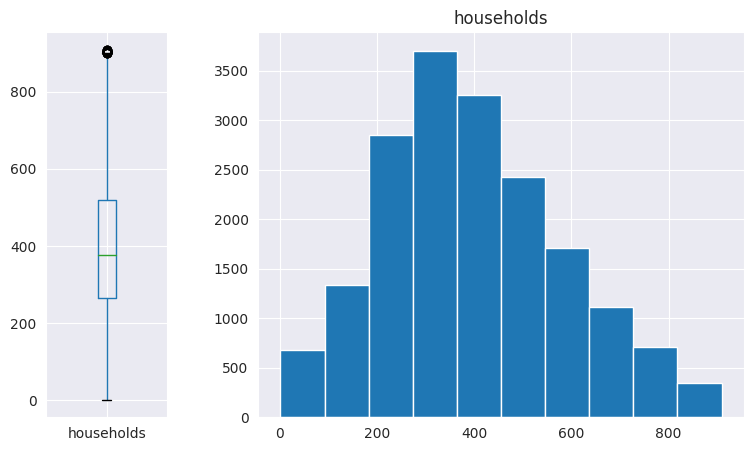

<Axes: >

array([<Axes: title={'center': 'median_income'}>], dtype=object)

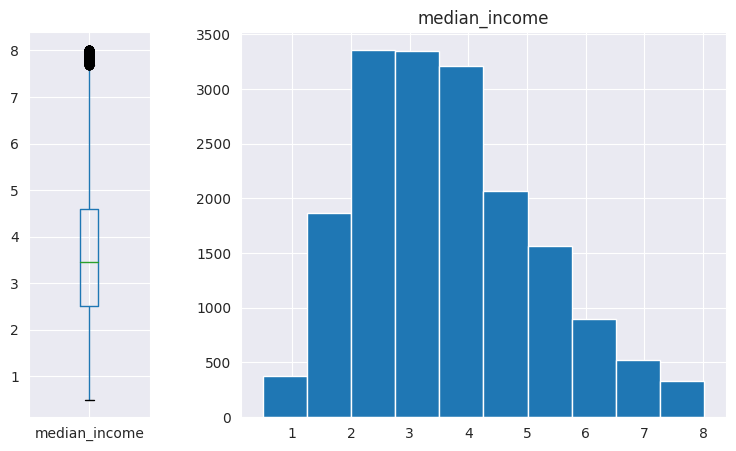

<Axes: >

array([<Axes: title={'center': 'median_house_value'}>], dtype=object)

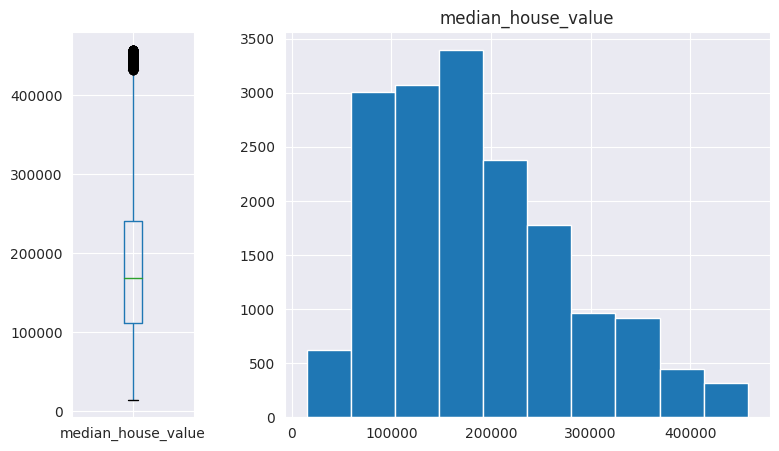

In [50]:
has_outliers = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

for col in has_outliers:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1

    small_outliers = housing[col] < (Q1 - 1.5 * IQR)
    big_outliers = housing[col] > (Q3 + 1.5 * IQR)

    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    housing[~(small_outliers | big_outliers)].boxplot(column=col,ax=axes[0]);
    housing[~(small_outliers | big_outliers)].hist(column=col, ax=axes[1]);
    housing = housing[~(small_outliers | big_outliers)]
    plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

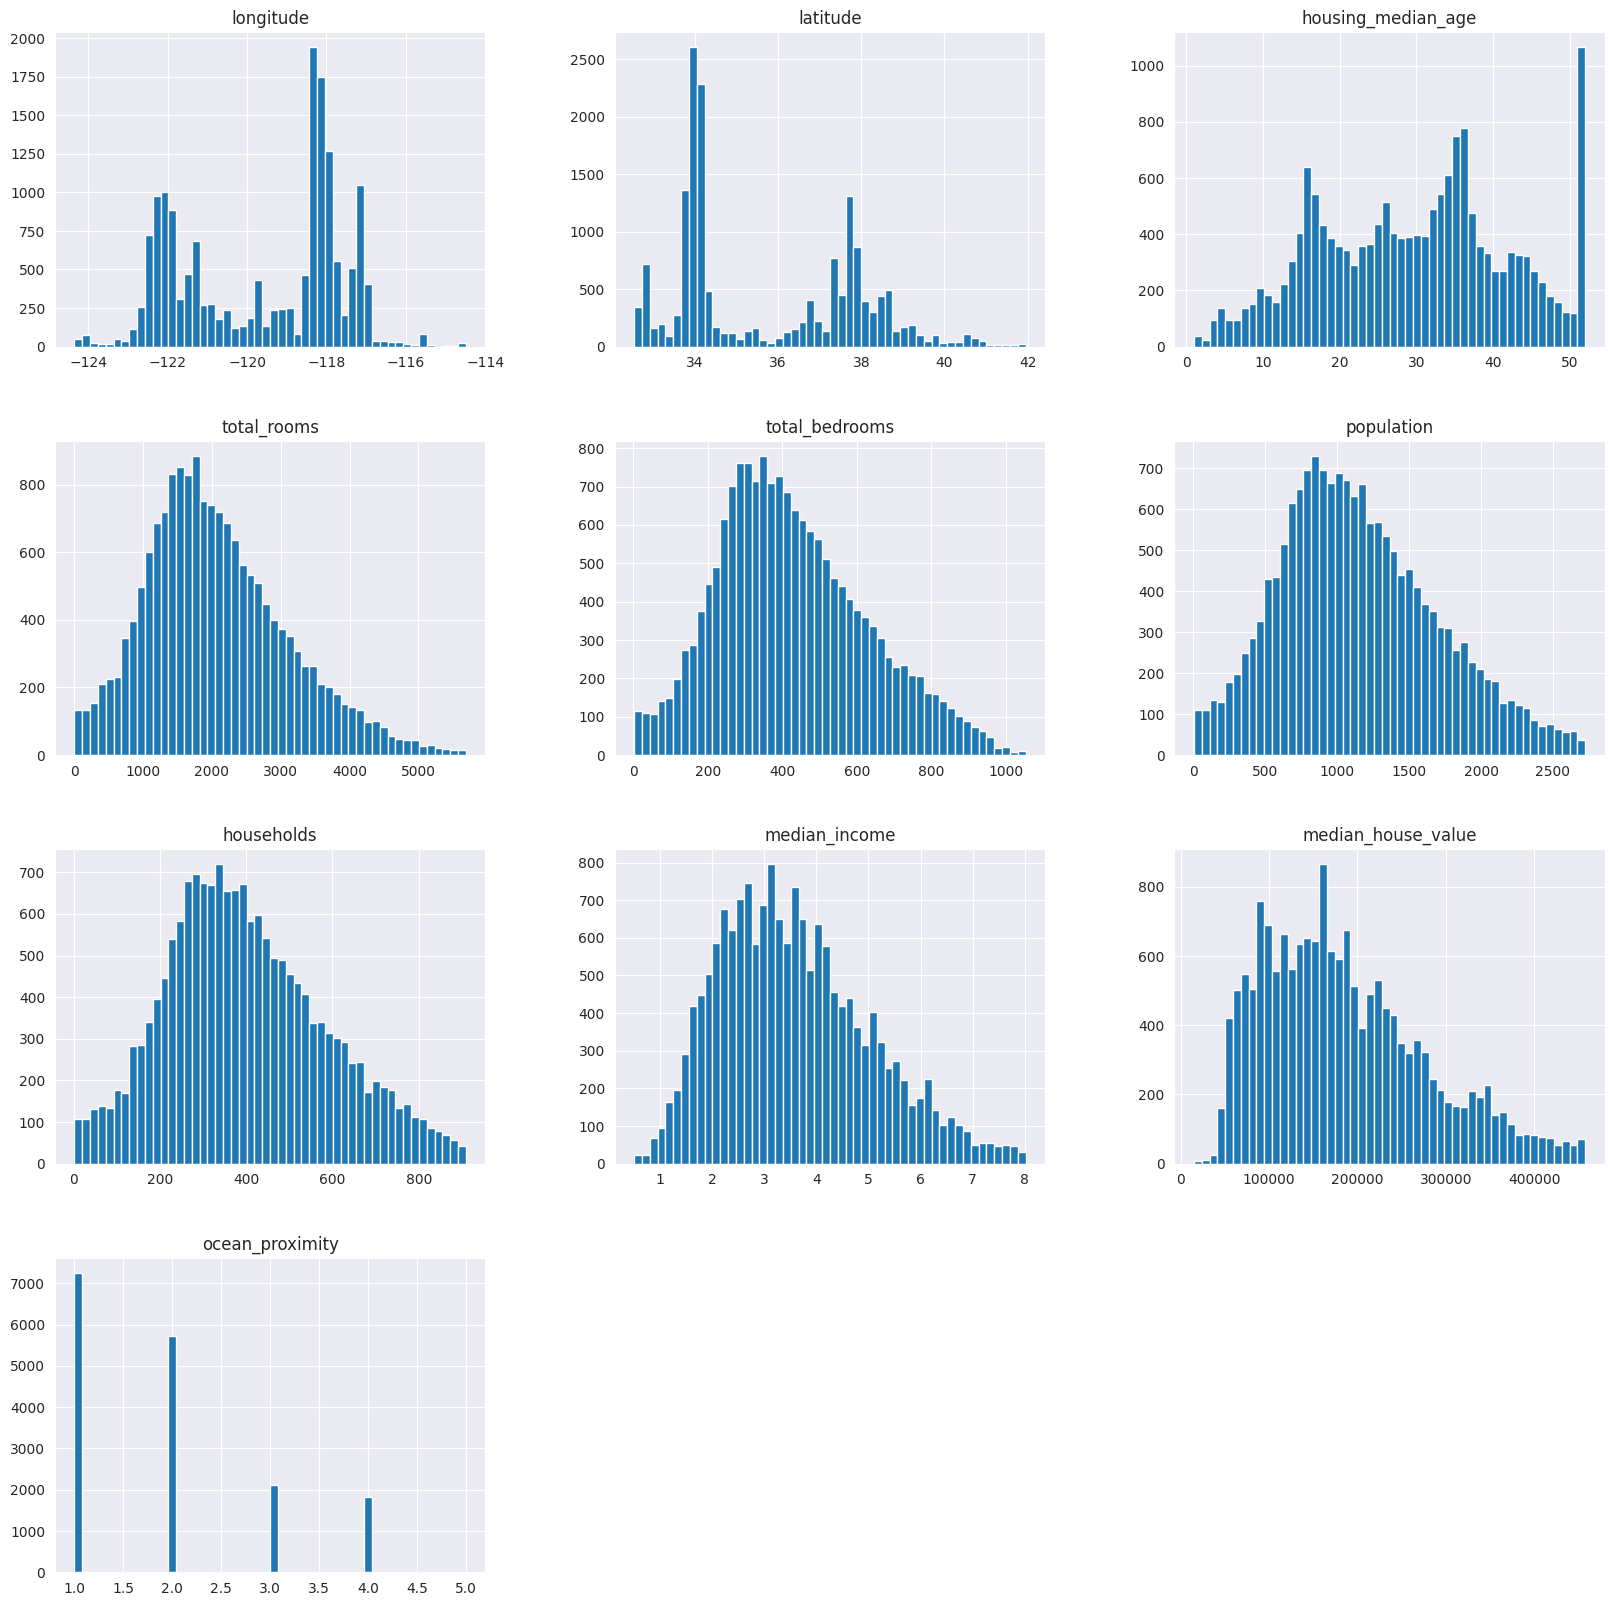

In [51]:
housing.hist(bins=50, figsize=(20, 20))

In [53]:
housing["housing_median_age"].describe()

count    16901.000
mean        29.663
std         12.212
min          1.000
25%         19.000
50%         30.000
75%         38.000
max         52.000
Name: housing_median_age, dtype: float64

In [ ]:
Credit['FinancingRatio'] = 100*Credit.AmountRequested/Credit.MarketPrice
Credit.FinancingRatio.hist(figsize=(8,8));